![llll.png](llll.png)

# Diabetes Classification Using Decision Tree

` by : Omar Qalalweh , Mohammad Mosleh `

`Instructor: Dr. Radi Jarrar`

`Section # 1 `



<p style="page-break-after:always;"></p>

### Introduction

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

In ML,it is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

![image.png](image.png)




Decision tree learning uses divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels.


So The basic idea behind any decision tree algorithm is as follows:
   - Select the best attribute using Attribute Selection Measures (ASM) to split the records.
   - Make that attribute a decision node and breaks the dataset into smaller subsets.
   - Start building the tree by repeating this process recursively for each child until one of the conditions:
        - All the tuples belong to the same attribute value.
        - There are no more remaining attributes.
        - There are no more instances.


However, as a tree grows in size, it becomes increasingly difficult to maintain its purity, and as a results , too little data will within a given subtree, and When this occurs, it is known as data fragmentation, and it can lead to overfitting, and because of that and To reduce complexity and prevent overfitting, pruning is usually employed, and we will talk about that in Optimization section.

**In this Project**, We are going to build an decision tree (Classification Decision Tree) using the [dataset given by the instructor](https://www.dropbox.com/s/ltoc6c32xjhy5kl/DiabetesData.csv) to predict if a new instance has diabetes or not.
*we are using the following technologies:*
- Python 3.7
- Pandas ( python library for fast data analysis)
- sklearn (python library For Dicision Tree Algo )
- six , IPython.display , pydotplus ( librarys for visualization the tree )


### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partitions data in the best possible manner, it gives a score for every attribute (featuer) by explaning the dataset , and the best score attribute is selected.

The most popular selection measures are:
- Information Gain
    - The difference between entropy before the split and average entropy after the split of the dataset based on given attribute values. (Used By ID3)

<img src="ig1.png" alt="Alternative text" />

<img src="ig2.png" alt="Alternative text" />

<img src="ig3.png" alt="Alternative text" />


       highest information gain feature is choosen
    
- Gain Ratio
    -  handles the issue of bias by normalizing the information gain using Split Info (Used By C4.5)
    
        ![gs1.png](g1.png)
        
        ![g2.png](g2.png)
        
        highest gain ratio is choosen
    
    
- Gini Index.
    - considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition.(used by CART)


        ![gg1.png](gg1.png)
        
        ![gg2.png](gg2.png)
        
        ![gg3.png](gg3.png)
        
        
        lowest gini index is choosen
        
**Note:** In our Project Gini Index Is used, scince we used scikit that uses CART Algo.


### importing libraries
we started our code by importing the essential library for the project

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import train_test_split #train_test_split function
from sklearn import metrics # accuracy calculation

### Loading Data from csv
here we loaded the data using pandas library and showed the first 5 rows.

In [2]:
data = pd.read_csv("DiabetesData.csv")
data.head() #display 5 rows of the dataset

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabetic
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0


```
data description:
    - NPG: Number of times pregnant
    - PGL: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    - DIA: Diastolic blood pressure (mm Hg)
    - TSF: Triceps skin fold thickness (mm)
    - INS: 2-Hour serum insulin (mu U/ml)
    - BMI: Body mass index
    - DPF: Diabetes pedigree function
    - AGE: Age (years)
    - Diabetic: Class variable (0: negative for diabetes or 1: positive for diabetes)
```

### Data Statistics
we used describe function from pandas to show the most common statistics measure, and also we ploted the visualization of the diabetes class

In [3]:
# Print the main statistics of each of the attributes
data.describe() 

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Diabetic Distribution')

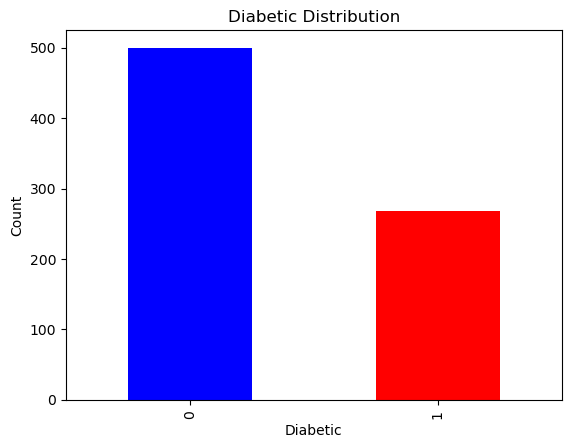

In [4]:
#Visualize the distribution of the diabetic class
plt = data['Diabetic'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.set_xlabel("Diabetic")
plt.set_ylabel("Count")
plt.set_title("Diabetic Distribution")

### Future Selection 
here we prepeare the data for the model by separating the features and target variable into separate variables

In [5]:
x = data[['NPG','PGL','DIA','TSF','INS','BMI','DPF','AGE']] #features
y = data['Diabetic'] #target variable

### Data Splitting
In this Project we will make two models ( M1 ,M2 ) with different splitting ratios
   * 70% training and 30% testing for M1
   * 50% training and 50% testing for M2

In [6]:
#splitting data into training and testing sets
m1_x_train, m1_x_test, m1_y_train, m1_y_test = train_test_split(x, y, test_size=0.3, random_state=1) #M1 data
m2_x_train, m2_x_test, m2_y_train, m2_y_test = train_test_split(x, y, test_size=0.5, random_state=1) #M2 data

### Model Building and Training
the model is built using DecisionTreeClassifier from sklearn library

*The Default Attribute Selection is used (GINI)*

In [7]:
M1 = DecisionTreeClassifier() #M1 model Defult gini ASM
M2 = DecisionTreeClassifier() #M2 model

M1 = M1.fit(m1_x_train,m1_y_train) # training M1
M2 = M2.fit(m2_x_train,m2_y_train) # training M2

### Evaluating the Model
After training the model , we used the test data to calculate the accuracy of every model

In [8]:
m1_y_pred = M1.predict(m1_x_test) #predicting M1
m2_y_pred = M2.predict(m2_x_test) #predicting M2

print("Accuracy of M1:",metrics.accuracy_score(m1_y_test, m1_y_pred)) #accuracy of M1
print("Accuracy of M2:",metrics.accuracy_score(m2_y_test, m2_y_pred)) #accuracy of M2

Accuracy of M1: 0.70995670995671
Accuracy of M2: 0.6822916666666666


**As We Can See,** The first Model gives a more accurate predication,

### Visualizing Model
here we imported the libraries that essentials for visualizing the tree.

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [10]:
dot_data_M1 = StringIO()
dot_data_M2 = StringIO()
export_graphviz(M1, out_file=dot_data_M1,
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['NO Diabetes','Diabetes'])
export_graphviz(M2, out_file=dot_data_M2,
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['NO Diabetes','Diabetes'])
graph_M1 = pydotplus.graph_from_dot_data(dot_data_M1.getvalue())
graph_M2 = pydotplus.graph_from_dot_data(dot_data_M2.getvalue())



- M1 Graph:

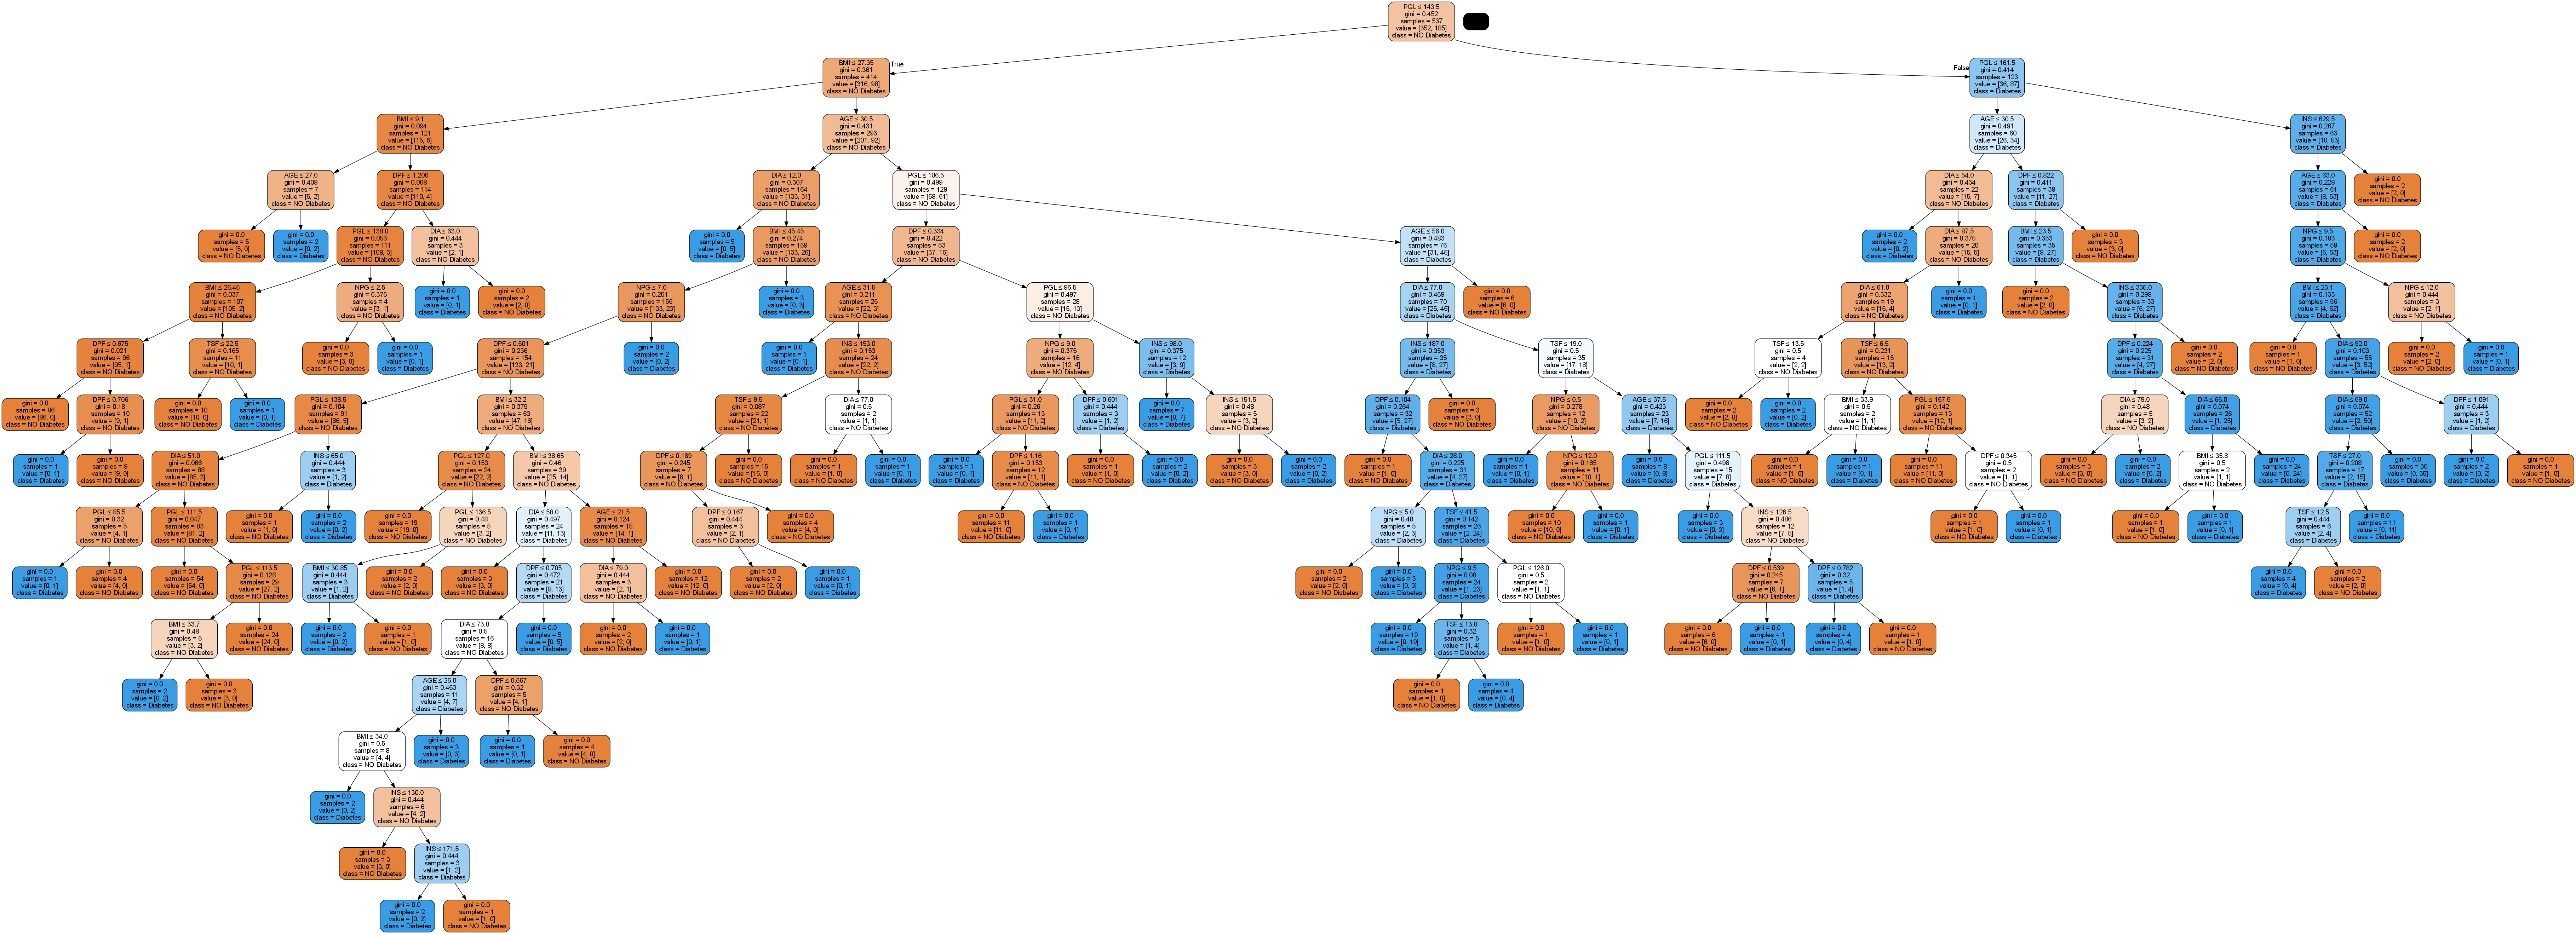

In [11]:
graph_M1.write_png('diabetes_M1.png')
Image(graph_M1.create_png())

- M2 Graph:

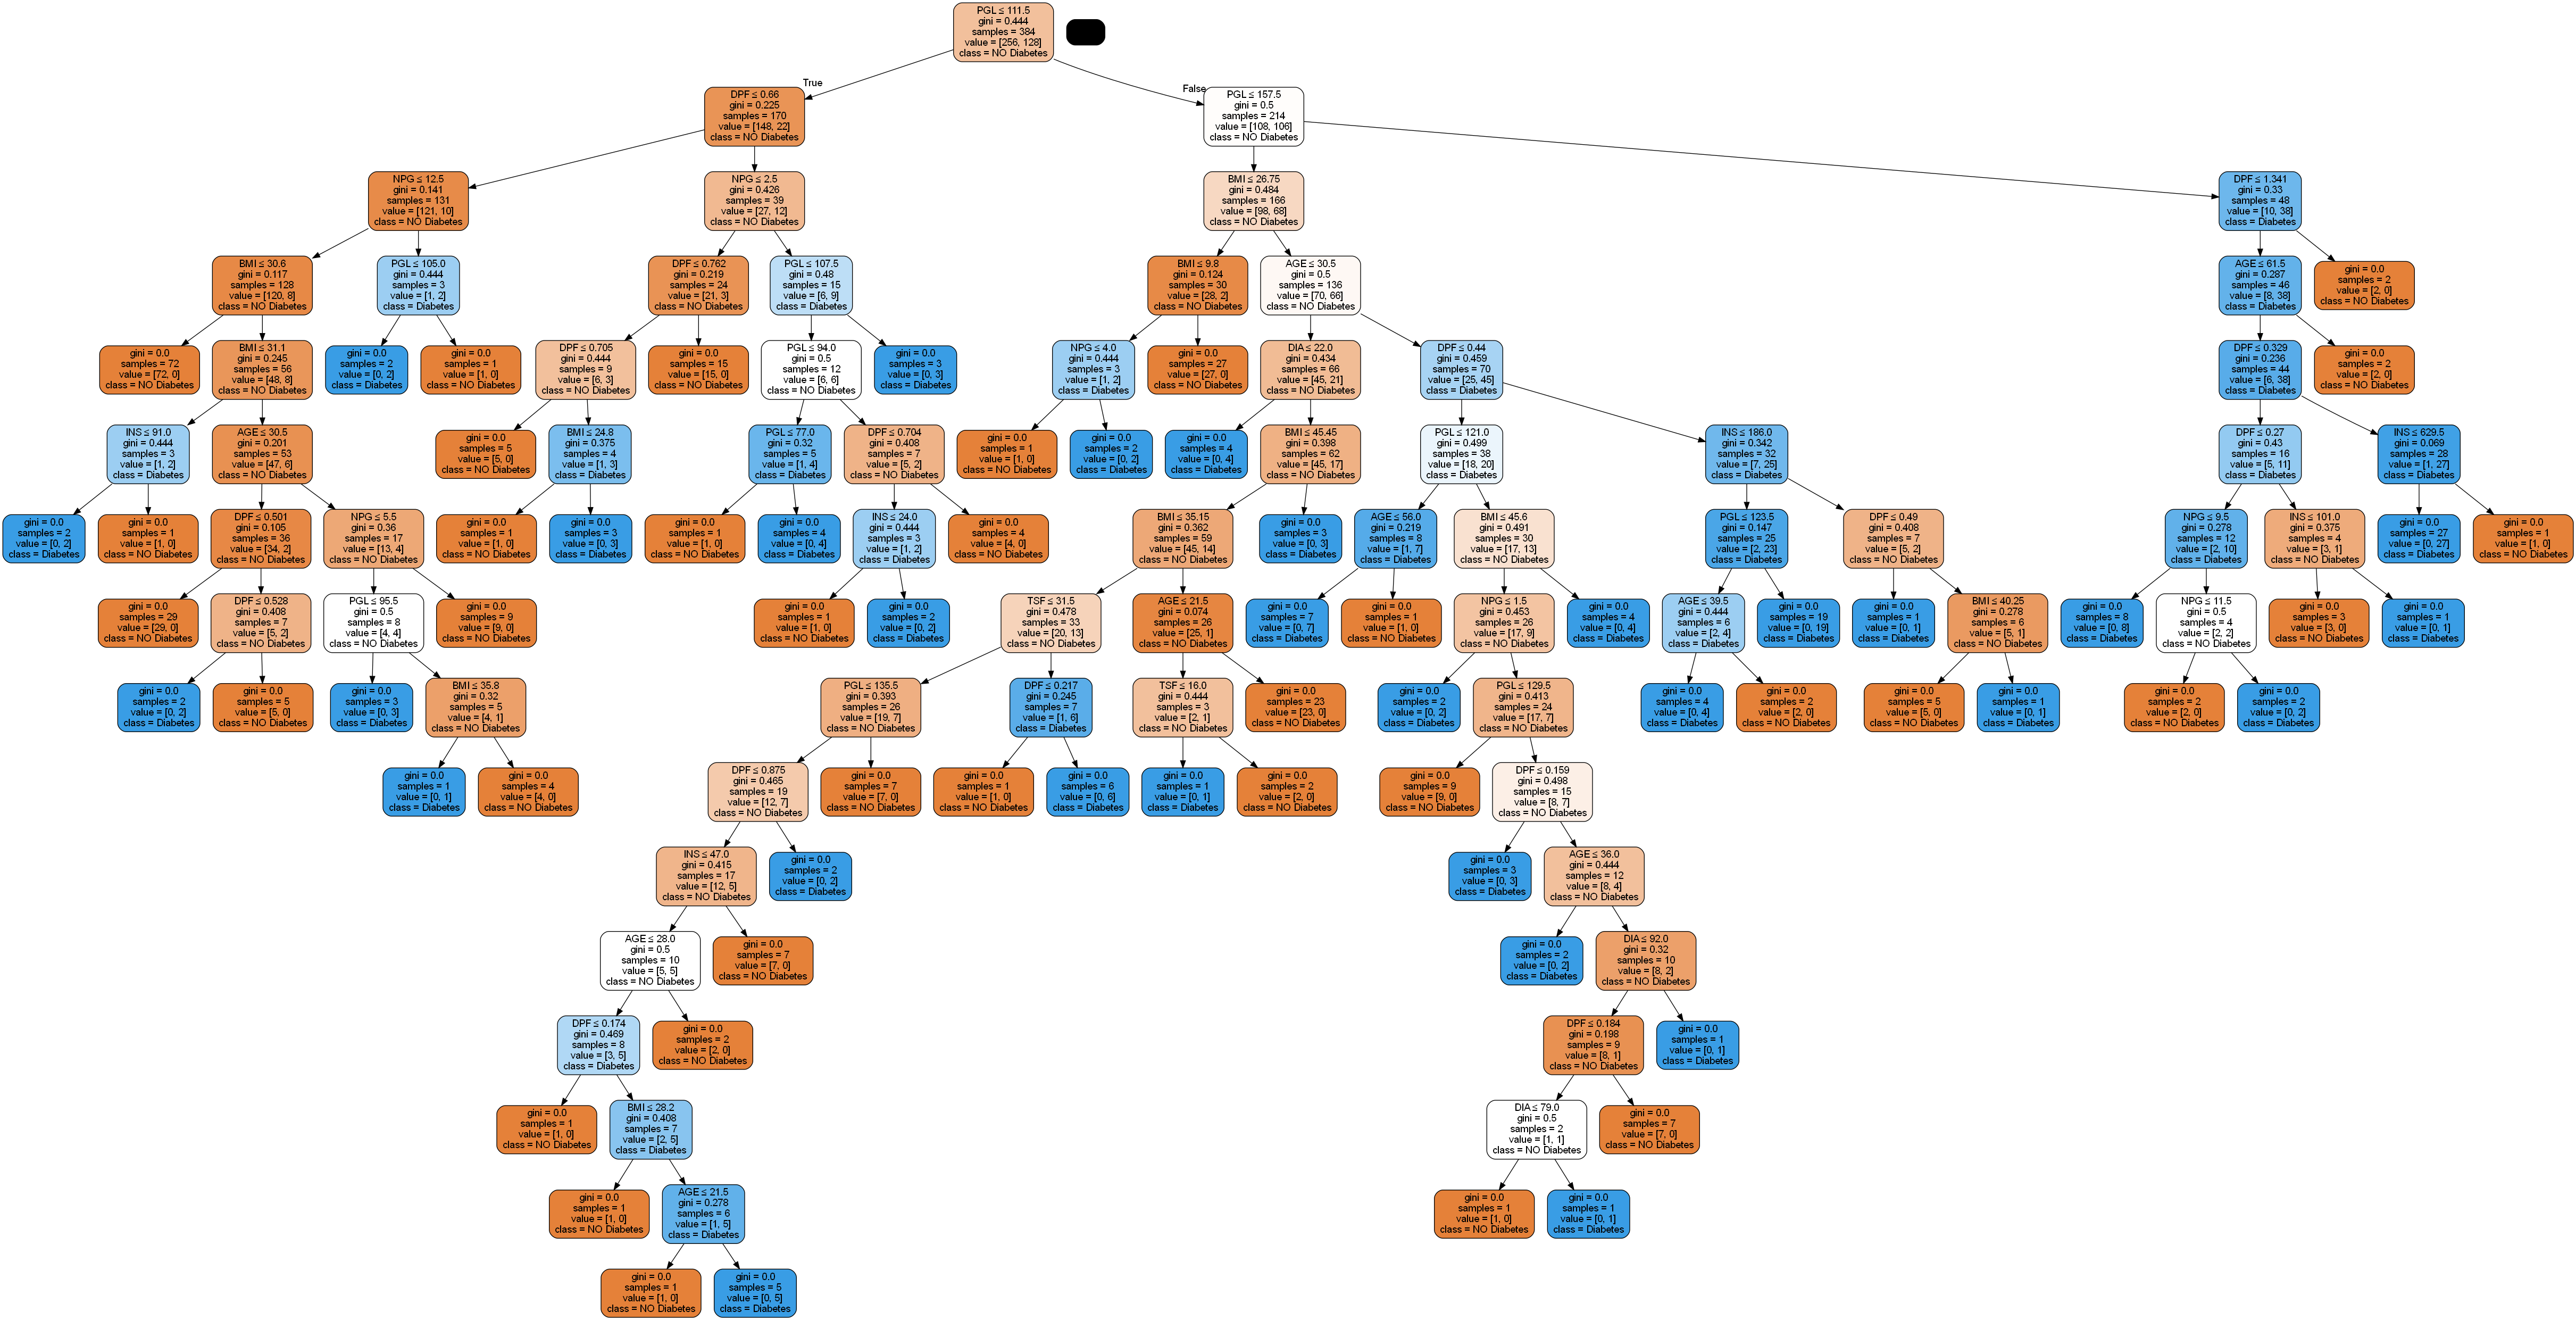

In [12]:
graph_M2.write_png('diabetes_M2.png')
Image(graph_M2.create_png())

### Optimization

As we mentioned before, Pruning is used for optimizing the decision tree, which removes branches that split on features with low importance, because a huge tree can lead to overfitting and lower the accuracy.

so , we will try to optimize M1 by making the Maxdepth = 2, using the same data.


In [13]:
M1_opt = DecisionTreeClassifier(max_depth=2) #M1_opt model

M1_opt = M1_opt.fit(m1_x_train,m1_y_train) # training 

m1_y_pred = M1_opt.predict(m1_x_test) #predicting

print("Accuracy of M1:",metrics.accuracy_score(m1_y_test, m1_y_pred)) #accuracy of M1_opt


Accuracy of M1: 0.7489177489177489


-> As we see the Accuracy improved (:

**Optimized Tree:**

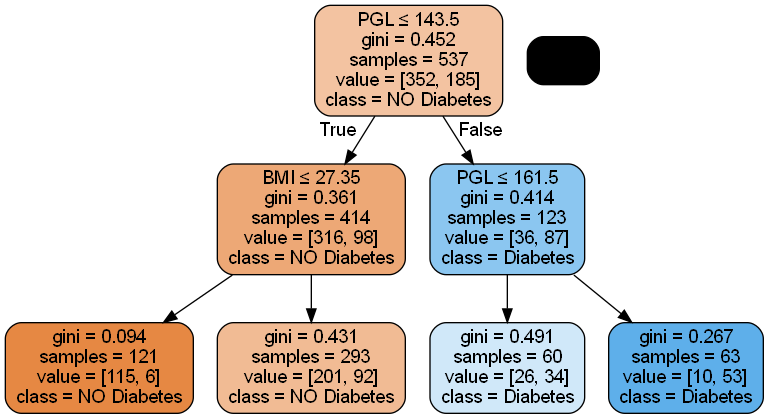

In [14]:
dot_data_M1_opt = StringIO()
export_graphviz(M1_opt, out_file=dot_data_M1_opt,
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['NO Diabetes','Diabetes'])
graph_M1_opt = pydotplus.graph_from_dot_data(dot_data_M1_opt.getvalue())
graph_M1_opt.write_png('diabetes_M1_opt.png')
Image(graph_M1_opt.create_png())

